**ИУ5-23М Морозевич Мария**

Необходимо изучить различные методы визуализации данных и создать историю на основе данных для набора данных.

# **Описание набора данных**

HTRU2 - это набор данных, описывающий выборку потенциальных пульсаров,собранных в ходе исследования Вселенной с высоким временным разрешением (South).

Представленный набор данных содержит 16 259 ложных примеров, вызванных радиочастотными помехами, и 1 639 реальных примеров пульсаров. Все эти примеры были проверены комментаторами-людьми.

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.io import arff

%matplotlib inline
sns.set(style="ticks")

In [65]:
!pip install ridgeplot

In [66]:
from ridgeplot import ridgeplot

In [67]:
data = arff.loadarff('HTRU_2.arff')
data_loaded = pd.DataFrame(data[0])

In [68]:
data = data_loaded

In [69]:
list(zip(data.columns, [i for i in data.dtypes]))

[('Profile_mean', dtype('float64')),
 ('Profile_stdev', dtype('float64')),
 ('Profile_skewness', dtype('float64')),
 ('Profile_kurtosis', dtype('float64')),
 ('DM_mean', dtype('float64')),
 ('DM_stdev', dtype('float64')),
 ('DM_skewness', dtype('float64')),
 ('DM_kurtosis', dtype('float64')),
 ('class', dtype('O'))]

In [70]:
data['class']=pd.to_numeric(data['class'])

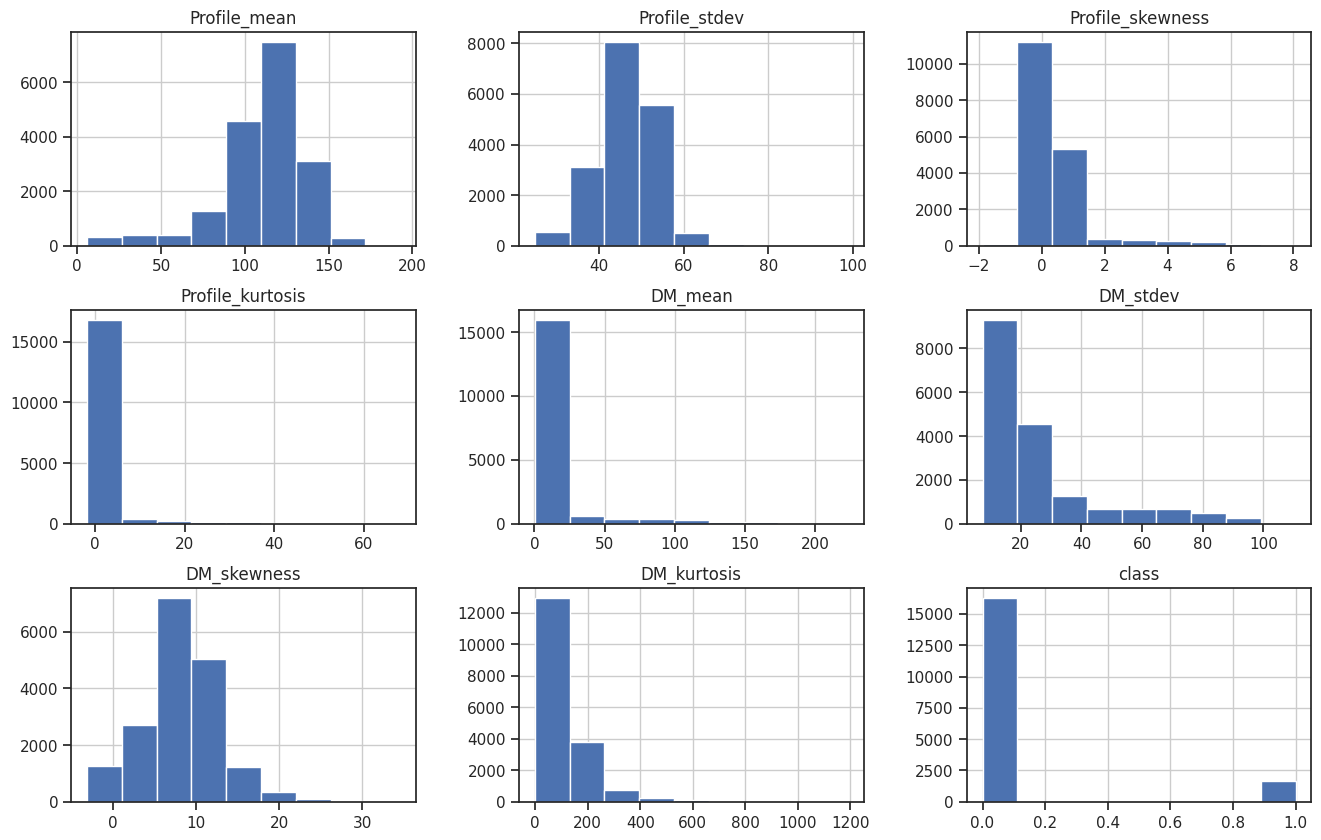

In [71]:
data.hist(bins=9, figsize=(16,10))
plt.show()

# Boxplot

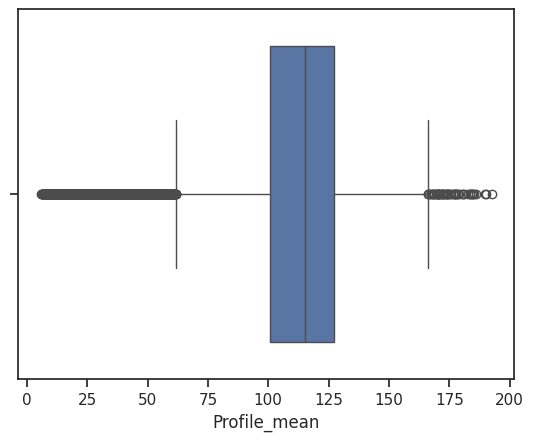

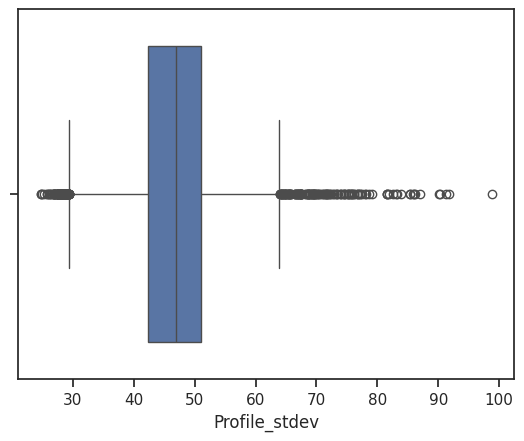

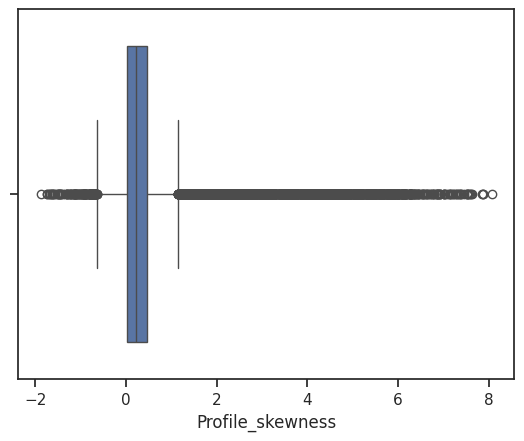

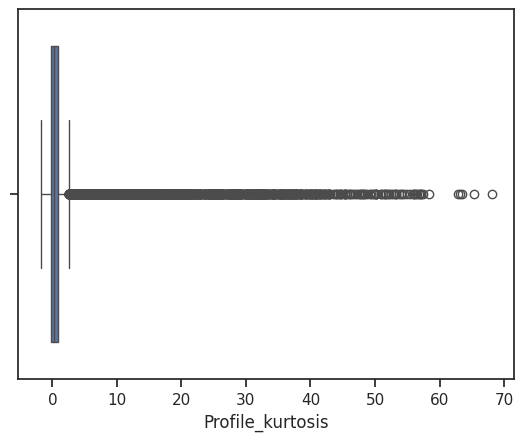

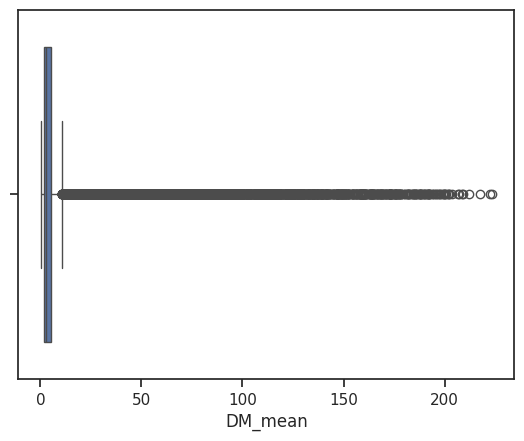

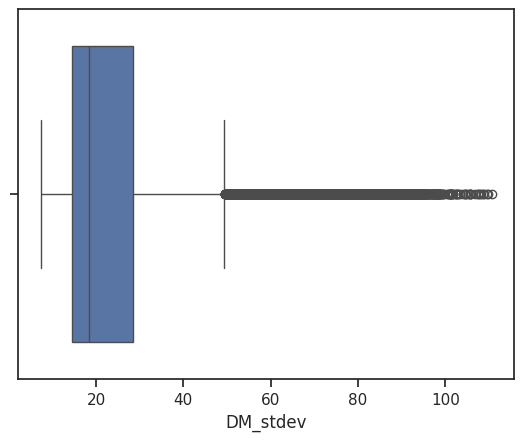

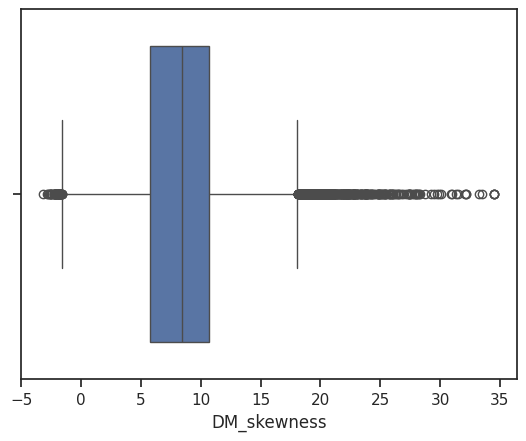

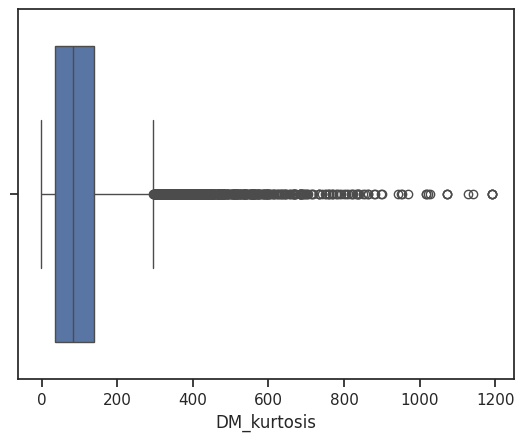

In [72]:
for cols in ['Profile_mean','Profile_stdev','Profile_skewness','Profile_kurtosis','DM_mean','DM_stdev','DM_skewness','DM_kurtosis']:
  sns.boxplot(x=data[cols])
  plt.show()

Из графиков можно отметить, что все признаки имеют ассиметричные распределения, далекие от нормального. Более того, многие значения могут быть выбросами

<Axes: xlabel='class', ylabel='Profile_skewness'>

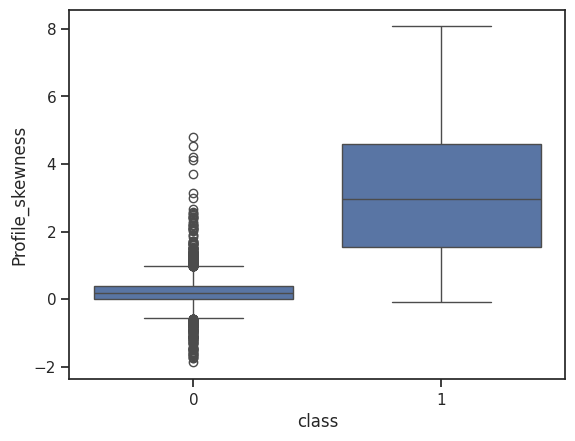

In [73]:
sns.boxplot(x=data['class'], y=data['Profile_skewness'])

Из графика видно, что значения для положительной оценки расположены около значений [2,5) признака «Profile_skewness».

<Axes: xlabel='class', ylabel='Profile_kurtosis'>

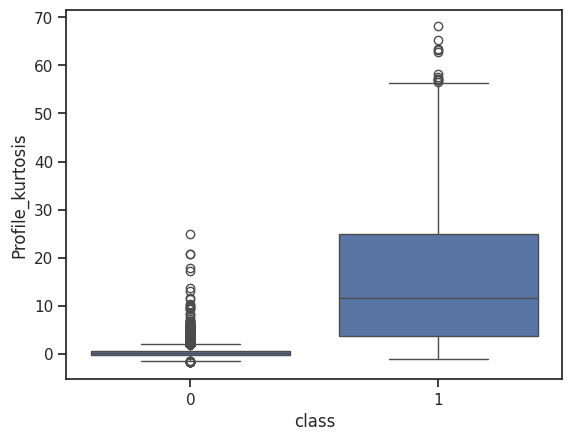

In [74]:
sns.boxplot(x=data['class'], y=data['Profile_kurtosis'])

Из графика видно, что значения для положительной оценки расположены около значений [5,25] признака «Profile_kurtosis».

<Axes: xlabel='class', ylabel='DM_mean'>

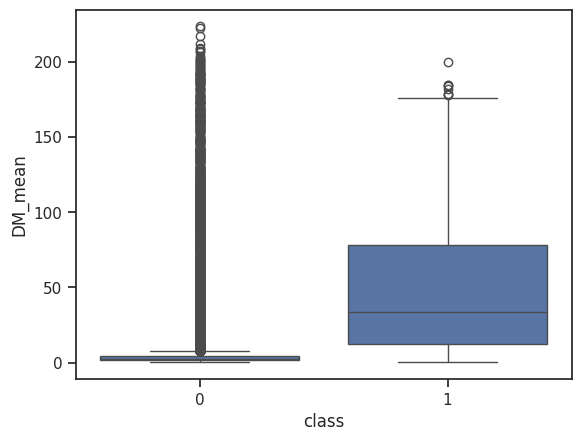

In [75]:
sns.boxplot(x=data['class'], y=data['DM_mean'])

Из графика видно, что значения для отрицательной оценки расположены вдоль всего диапазона признака «DM_mean».

# Violinplot

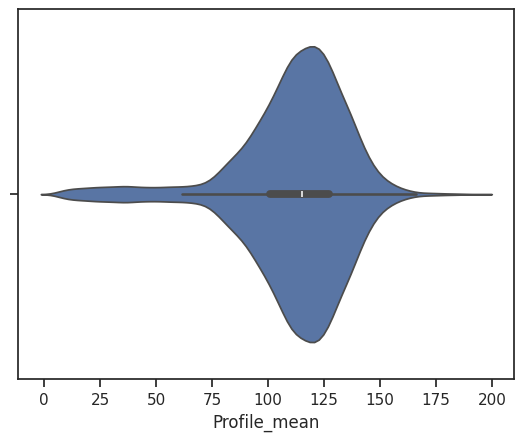

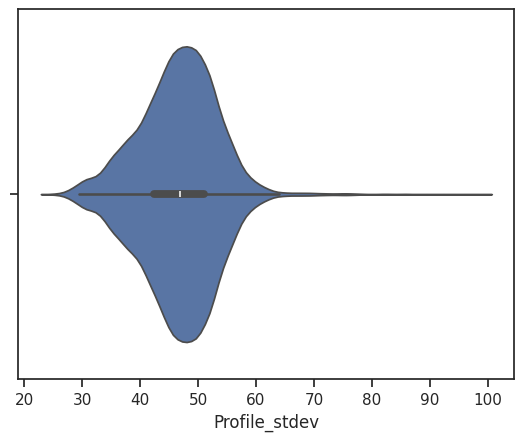

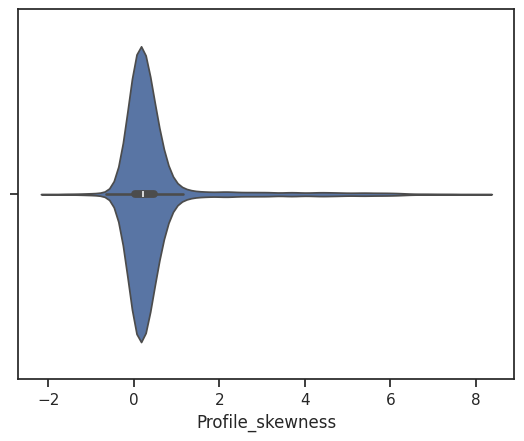

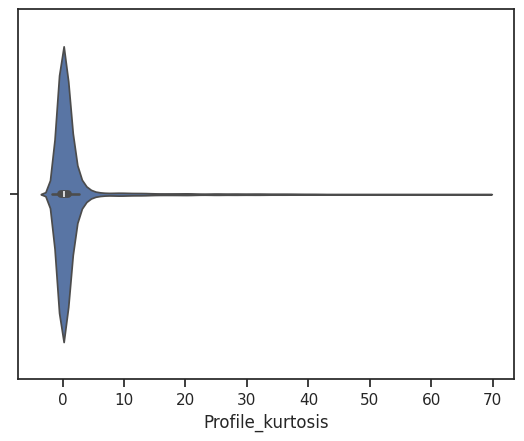

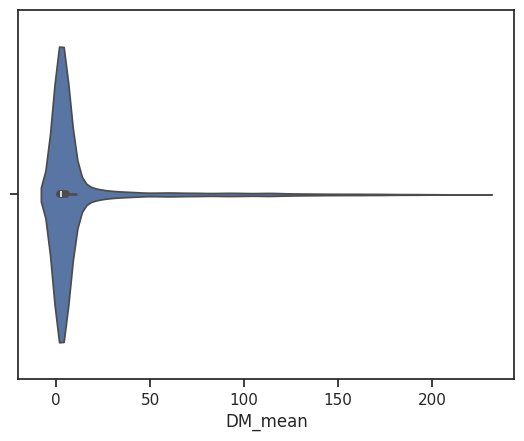

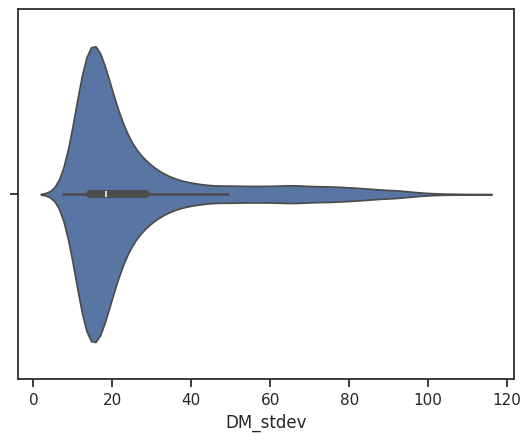

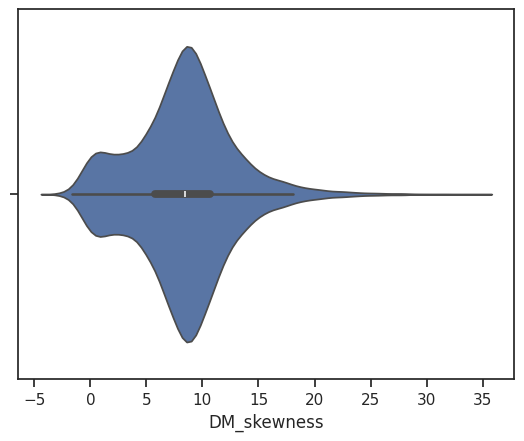

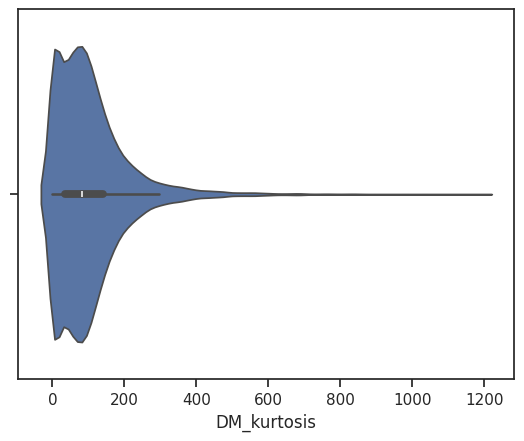

In [76]:
for cols in ['Profile_mean','Profile_stdev','Profile_skewness','Profile_kurtosis','DM_mean','DM_stdev','DM_skewness','DM_kurtosis']:
  sns.violinplot(x=data[cols])
  plt.show()

Из графиков можно отметить, что все признаки имеют ассиметричные плотности.

<Axes: xlabel='class', ylabel='Profile_skewness'>

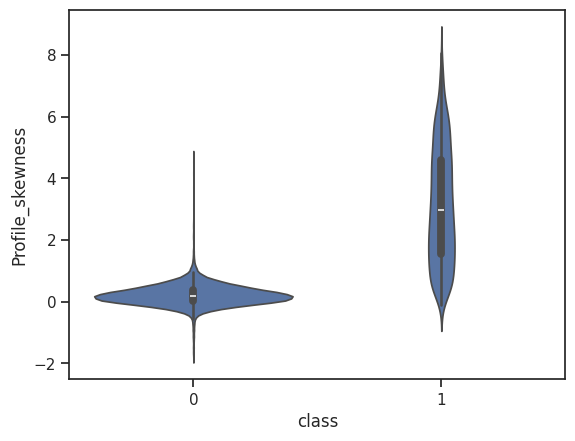

In [77]:
sns.violinplot(x=data['class'], y=data['Profile_skewness'])

<Axes: xlabel='class', ylabel='Profile_kurtosis'>

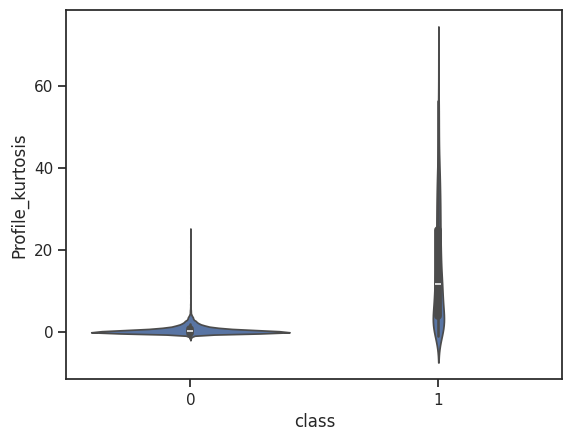

In [78]:
sns.violinplot(x=data['class'], y=data['Profile_kurtosis'])

По графикам видно, что для отрицательного оценки большинство значений признака находится около 0.

<Axes: xlabel='class', ylabel='DM_mean'>

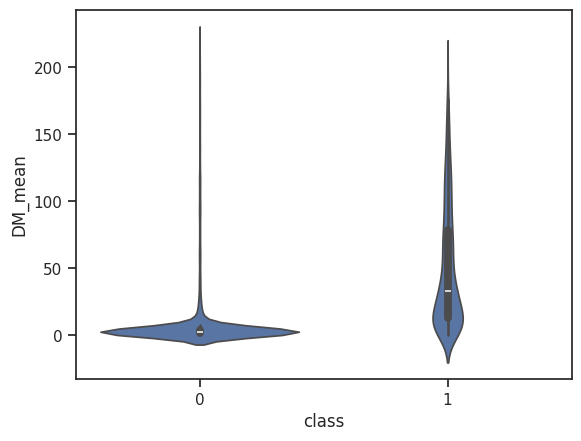

In [79]:
sns.violinplot(x=data['class'], y=data['DM_mean'])

По графику видно, что большая часть значений признака распределена около 0 для обоих значений целевого признака.

In [80]:
column_names = ['Profile_mean','Profile_stdev','Profile_skewness','Profile_kurtosis', 'DM_mean','DM_stdev','DM_skewness','DM_kurtosis']
df = data[column_names]

# PCA

In [83]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = data.loc[:, column_names].values

# Separating out the target
y = data.loc[:,['class']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [85]:
finalDf = pd.concat([principalDf, data[['class']]], axis = 1)

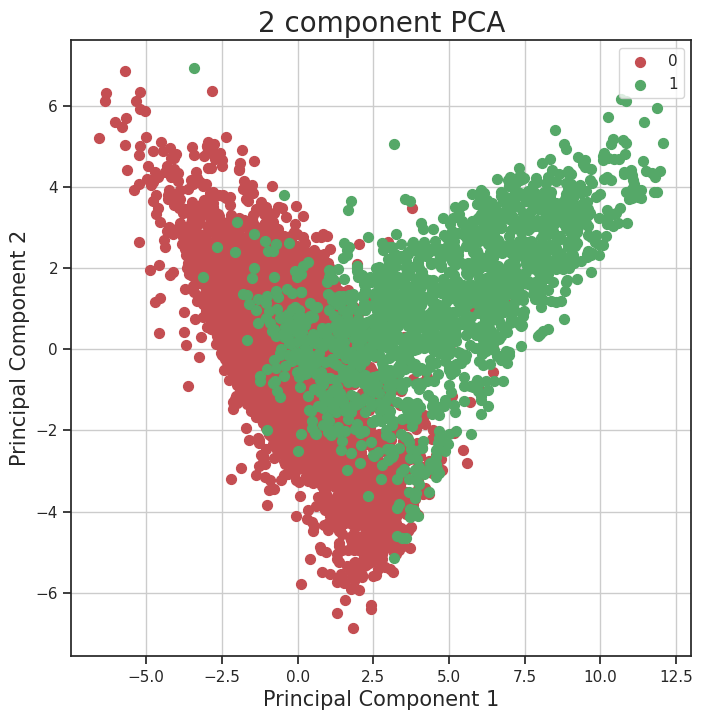

In [86]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [87]:
pca.explained_variance_ratio_

array([0.51675584, 0.26807564])

In [93]:
pca.explained_variance_ratio_.sum()

0.7848314751537133

По результату анализа можно выделить 2 новых признака, которые будут содержать 78,48% информации из 8 исходных признаков.

In [94]:
pca1 = PCA(n_components=3)

principalComponents = pca1.fit_transform(x)


In [95]:
pca1.explained_variance_ratio_

array([0.51675584, 0.26807564, 0.10116862])

Третий признак будет нести всего лишь 10,11% информации. Однако суммарная информация приблизилась к 90%.

In [96]:
pca1.explained_variance_ratio_.sum()

0.8860000956209395

# Correlogram

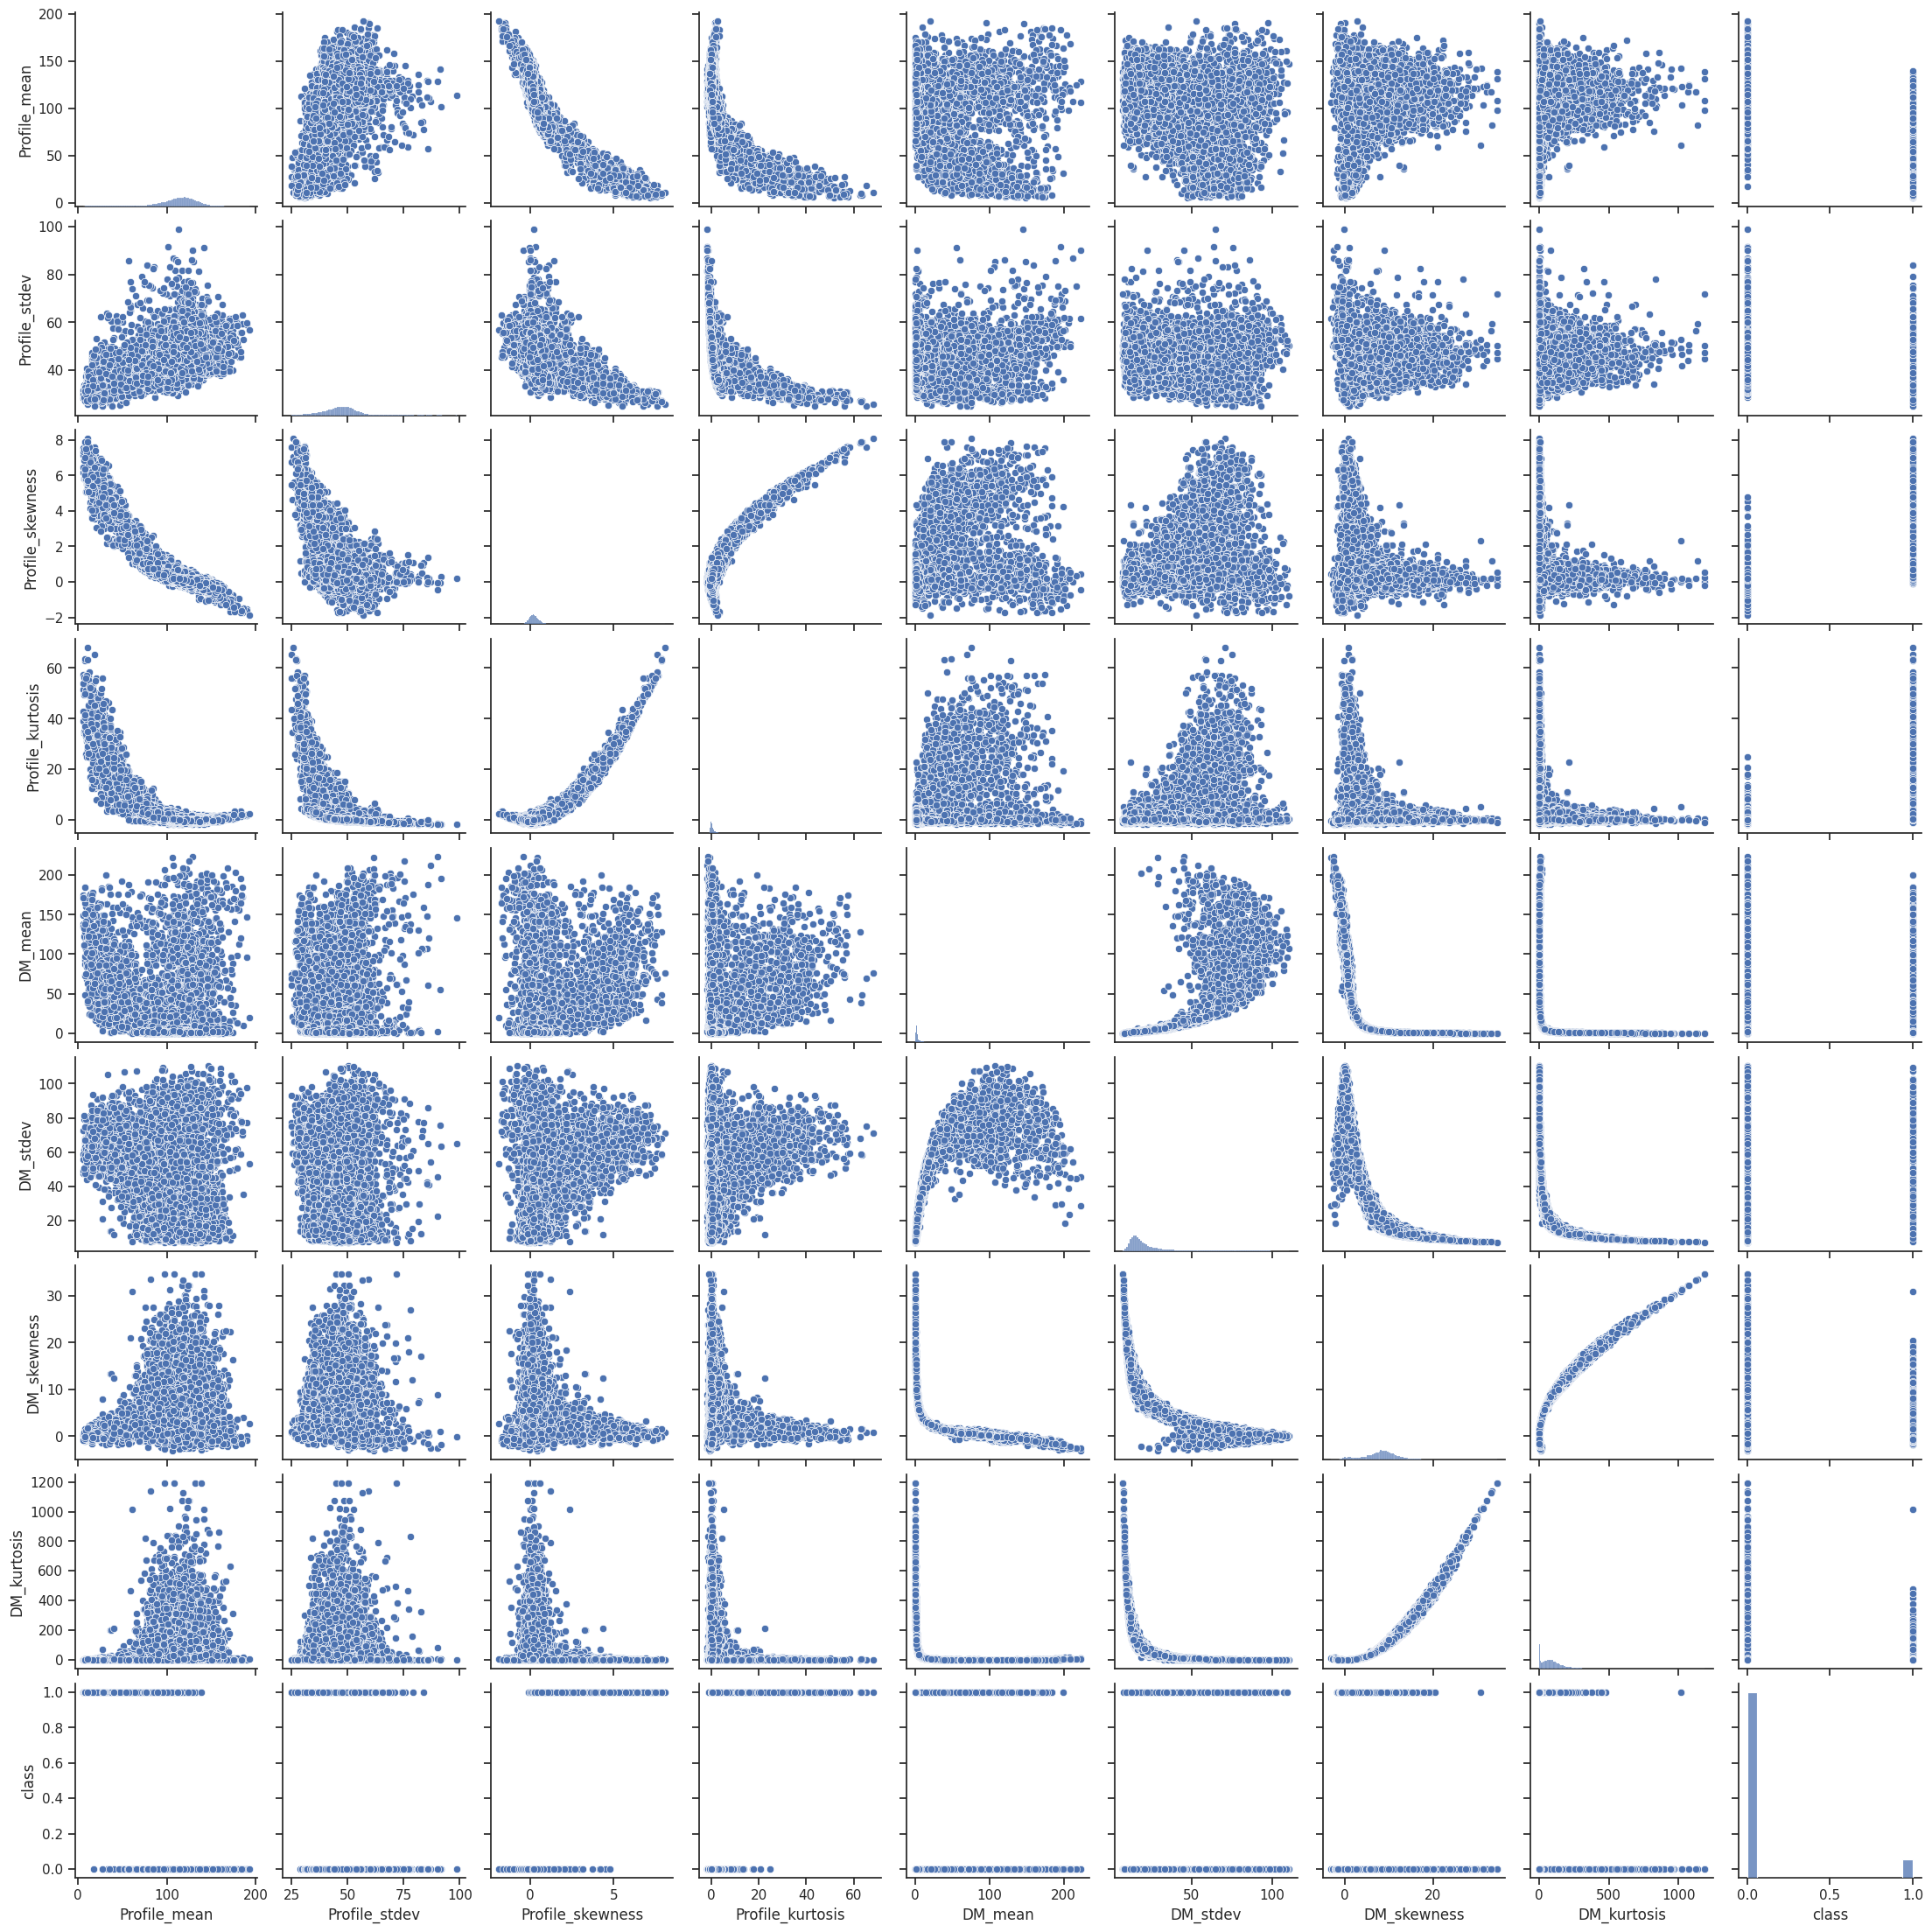

In [98]:
sns.pairplot(data)

По графикам можно отметить, что между многими признаками наблюдается корреляция. Например, признаками «DM_kurtosis» и «DM_skewness». При этом можно выделить две группы коррелирующих признаков «Profile_» и «DM_», так как они описывают кривые и связаны между собой, но между признаками групп связь меньше.

# Heatmap

<Axes: >

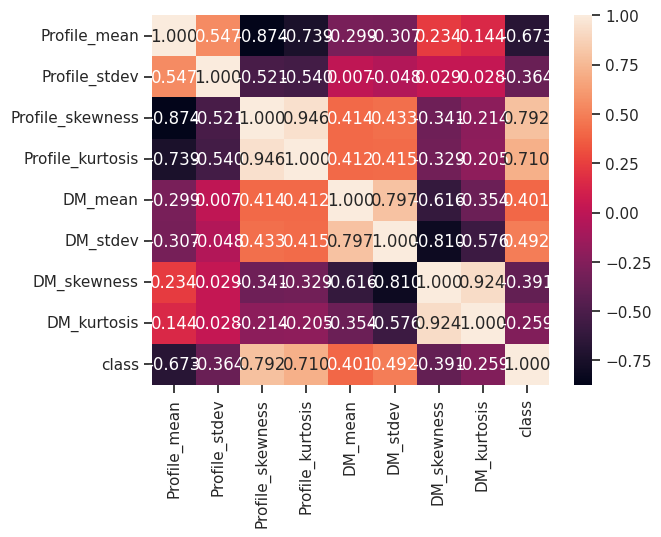

In [99]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

Из нее можно отметить, что наибольшие по модулю значения корреляции наблюдаются в группах, а наименьшие между признаками из разных групп.